# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Pip installing openpyxl

In [2]:
!py -m pip install openpyxl


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: C:\Users\MATHEUS\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip


## Loading the excel

In [3]:
df = pd.read_excel(r'Data_Train.xlsx')

# Exploring the data

In [4]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [5]:
df.shape

(10683, 11)

In [6]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


It looks there aren't too many values missing.

In [8]:
# Checking the unique values to see if there's missing information
for col in df.drop(columns=['Price', 'Arrival_Time']).columns:
    print(col)
    print(df[col].nunique())
    print(df[col].unique())
    print('---' * 20)

Airline
12
['IndiGo' 'Air India' 'Jet Airways' 'SpiceJet' 'Multiple carriers' 'GoAir'
 'Vistara' 'Air Asia' 'Vistara Premium economy' 'Jet Airways Business'
 'Multiple carriers Premium economy' 'Trujet']
------------------------------------------------------------
Date_of_Journey
44
['24/03/2019' '1/05/2019' '9/06/2019' '12/05/2019' '01/03/2019'
 '24/06/2019' '12/03/2019' '27/05/2019' '1/06/2019' '18/04/2019'
 '9/05/2019' '24/04/2019' '3/03/2019' '15/04/2019' '12/06/2019'
 '6/03/2019' '21/03/2019' '3/04/2019' '6/05/2019' '15/05/2019'
 '18/06/2019' '15/06/2019' '6/04/2019' '18/05/2019' '27/06/2019'
 '21/05/2019' '06/03/2019' '3/06/2019' '15/03/2019' '3/05/2019'
 '9/03/2019' '6/06/2019' '24/05/2019' '09/03/2019' '1/04/2019'
 '21/04/2019' '21/06/2019' '27/03/2019' '18/03/2019' '12/04/2019'
 '9/04/2019' '1/03/2019' '03/03/2019' '27/04/2019']
------------------------------------------------------------
Source
5
['Banglore' 'Kolkata' 'Delhi' 'Chennai' 'Mumbai']
------------------------------

`Additional_Info` column has missing information as 'No info' or 'No Info' instead of nan  

## Airline ticket value

<Figure size 1600x800 with 0 Axes>

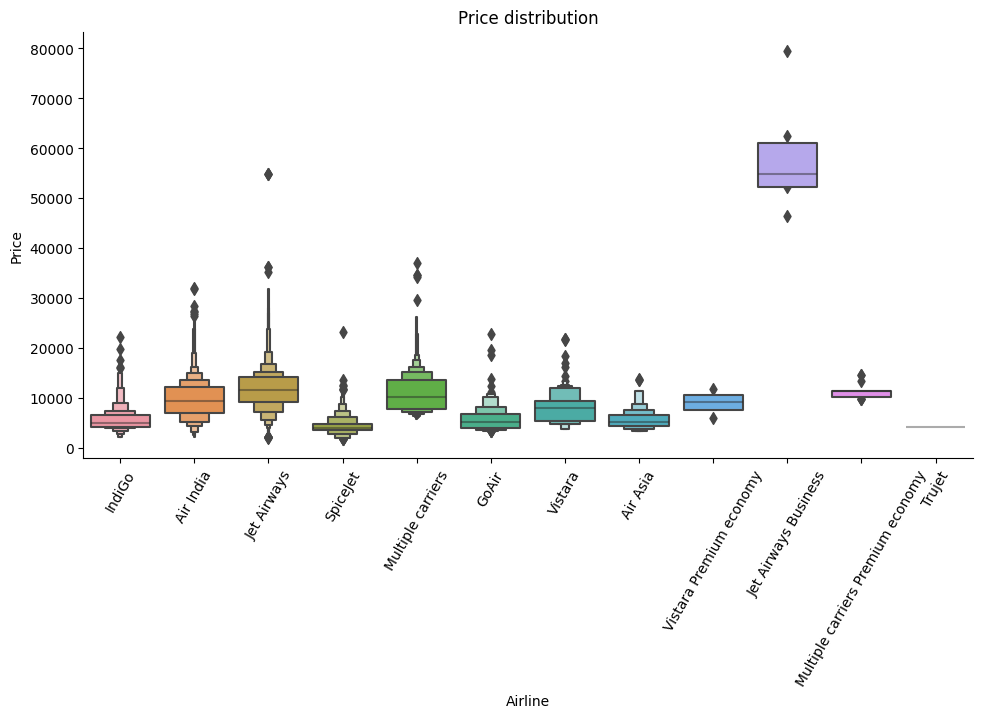

In [9]:
plt.figure(figsize=(16,8))
sns.catplot(data=df, 
            x='Airline', 
            y='Price', 
            kind='boxen', 
            aspect=2)
plt.title('Price distribution')
plt.xticks(rotation=60);

Prices `Jet  Airways Business` higher than the others companies. Airlines in general have many outliers. It looks like we have airlines that is more expensive than others

Let's group the the dataset by airline and see the mean of price of each airline

In [10]:
# Group the dataframe by airline and see the mean fo the price
group = df.groupby(by='Airline')[['Price']].mean()

# Name is to long, I'm just chnaging to a short one
group.rename(
    index={'Multiple carriers Premium economy': 'Multiple carriers PE'}, 
    inplace=True)

In [11]:
# Display the dataframe rounded by 2 decimals
round(group, 2)

,Price
Airline,
Air Asia,5590.26
Air India,9611.21
GoAir,5861.06
IndiGo,5673.68
Jet Airways,11643.92
Jet Airways Business,58358.67
Multiple carriers,10902.68
Multiple carriers PE,11418.85
SpiceJet,4338.28


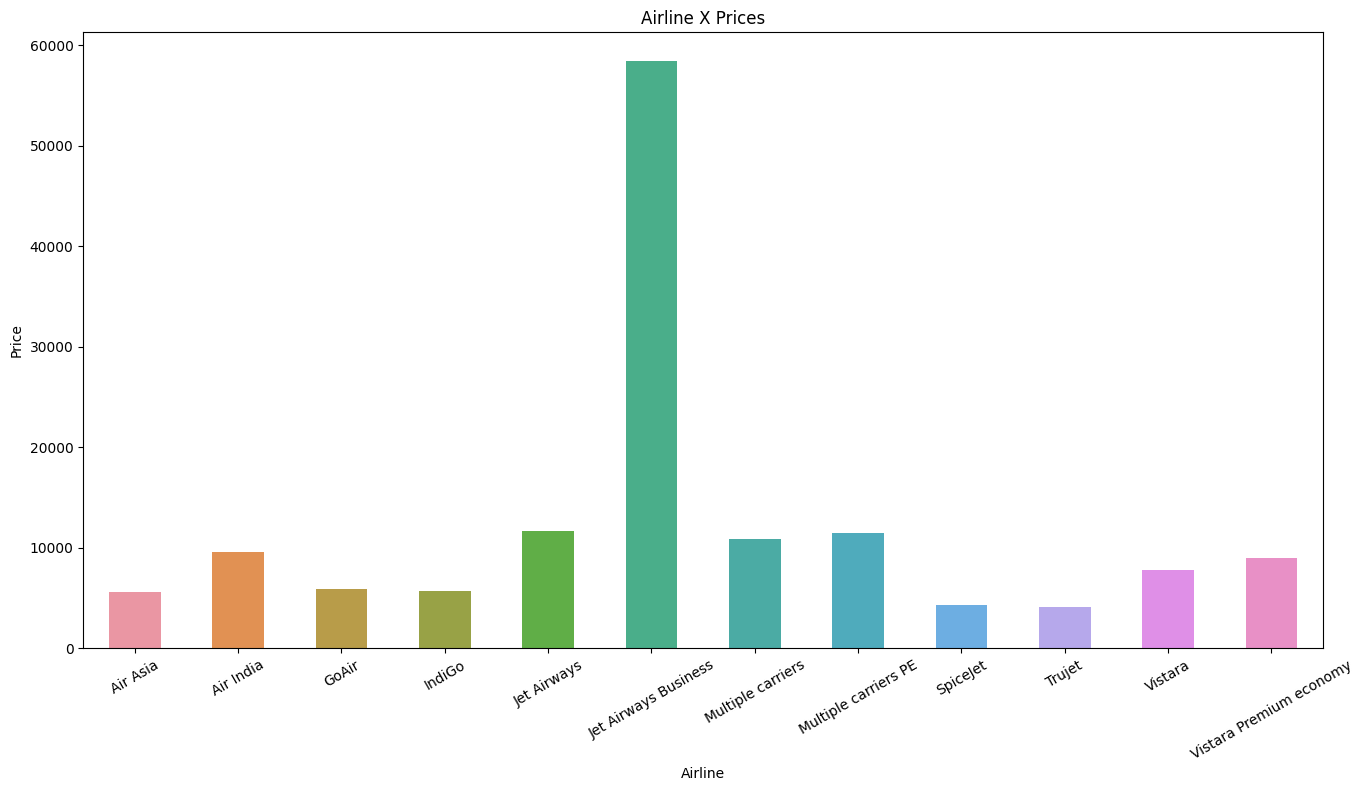

In [12]:
# Set the figure size
plt.figure(figsize=(16,8))

# PLot the group dataframe
sns.barplot(data=group, x=group.index, y=group['Price'], width=0.5)
plt.xticks(rotation=30, )
plt.title('Airline X Prices');

We can see that `Jet Airways Bussiness` is by far the most expensive airline. Normally business jet are pretty expensive compare with the other airlines.

We also could have a look on the number of flight for each airline.

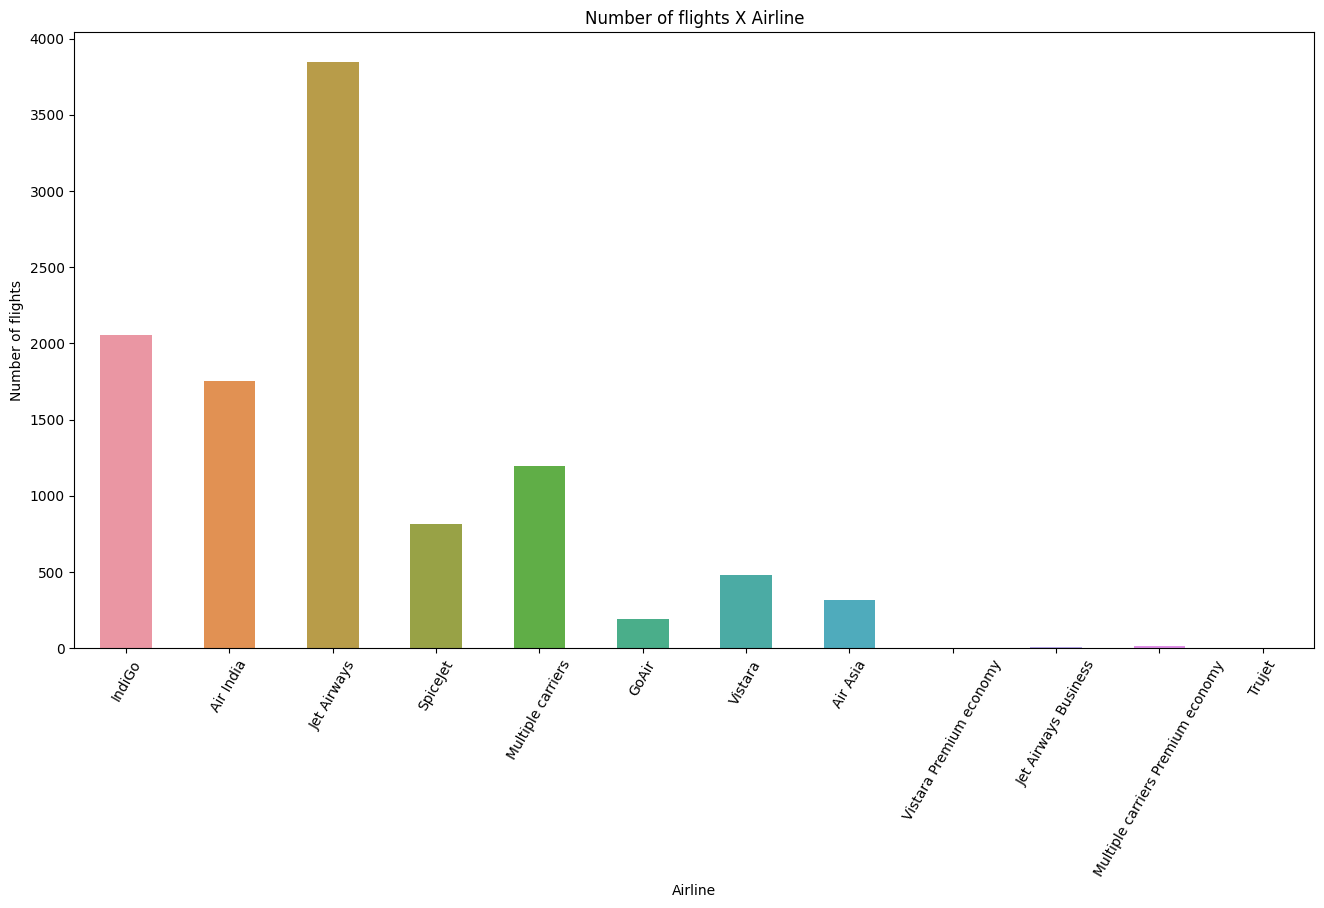

In [13]:
plt.figure(figsize=(16, 8))
sns.countplot(data=df, x='Airline', width=0.5)
plt.ylabel('Number of flights')
plt.title('Number of flights X Airline')
plt.xticks(rotation=60);

Jet `Jet Airways` is possibly the most popular airline. The number of `Jet Airways` flights is almost the double of `IndiGo` flights which is the second airline with most number of flights 

We can also see the the number of `Jet Airways Business` is pretty low, but still with mean of price pretty high

## Source and Destination

### Destination

Which destination the people look to flight to?

In [14]:
agrr = df.pivot_table(index='Airline', columns='Destination', values='Price', aggfunc='mean').fillna(0)

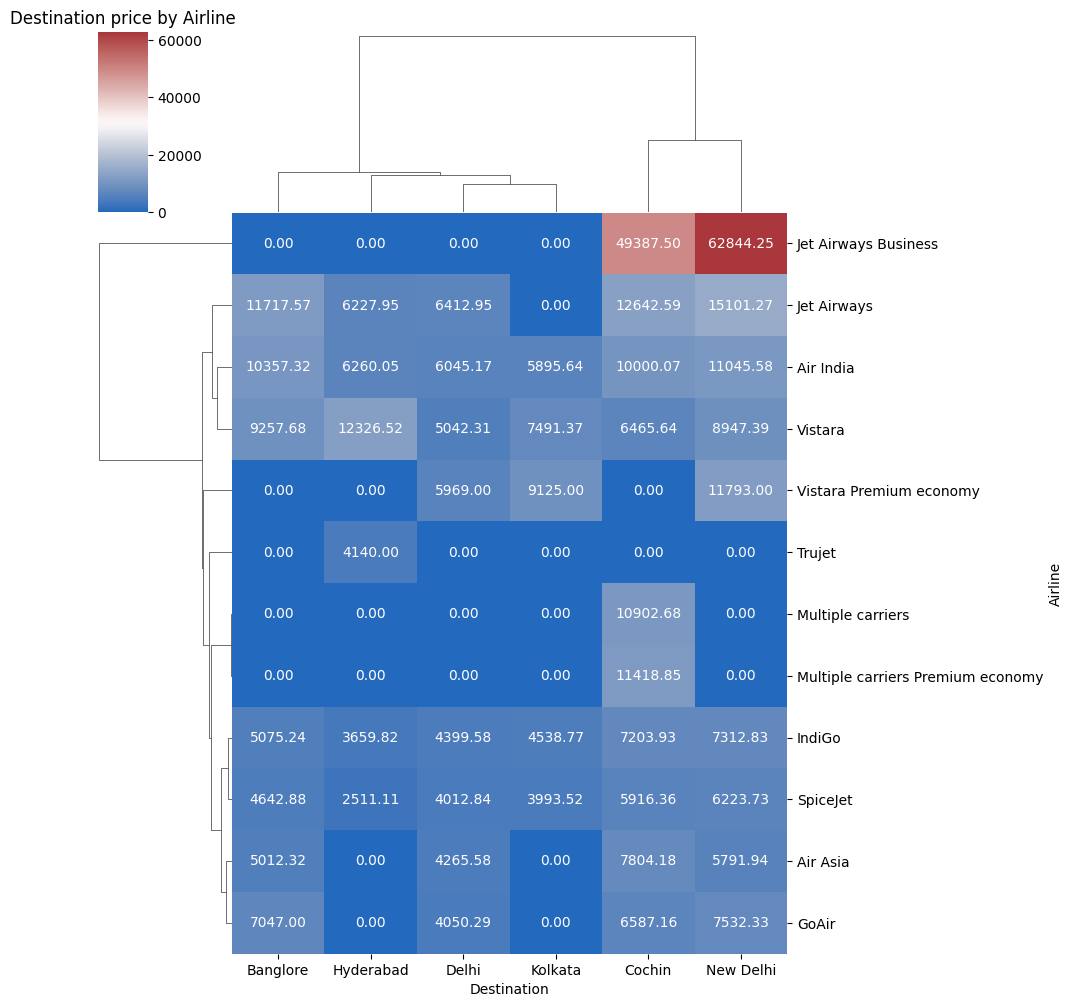

In [15]:
sns.clustermap(data=agrr, annot=True, fmt=".2f", vmin=0, cmap='vlag')
plt.title('Destination price by Airline');

In [16]:
# Group the airline and destination
destination_count = df.groupby(by=['Airline', 'Destination'])[['Destination']].count()

# Rename destionation column to destionatio count
destination_count.rename(columns={'Destination': 'destination_count'}, inplace=True)

In [17]:
# Save the price mean of the price for each destination
price_mean = df.groupby(by=['Airline', 'Destination'])[['Price']].mean()

In [18]:
# Concat the both dataframe in one rounding the price by 2 decimals
destination_price = pd.concat([destination_count, round(price_mean, 2)], axis=1)

destination_price

destination_count     Price
Airline                           Destination                             
Air Asia                          Banglore                   150   5012.32
                                  Cochin                      80   7804.18
                                  Delhi                       71   4265.58
                                  New Delhi                   18   5791.94
Air India                         Banglore                   512  10357.32
                                  Cochin                     747  10000.07
                                  Delhi                      120   6045.17
                                  Hyderabad                  136   6260.05
                                  Kolkata                     25   5895.64
                                  New Delhi                  212  11045.58
GoAir                             Banglore                    25   7047.00
                                  Cochin                      76   6587.16
                                  Delhi                       69   4050.29
                                  New Delhi                   24   7532.33
IndiGo                            Banglore                   445   5075.24
                                  Cochin                     705   7203.93
                                  Delhi                      366   4399.58
                                  Hyderabad                  196   3659.82
                                  Kolkata                    184   4538.77
                                  New Delhi                  157   7312.83
Jet Airways                       Banglore                  1256  11717.57
                                  Cochin                    1586  12642.59
                                  Delhi                      370   6412.95
                                  Hyderabad                  219   6227.95
                                  New Delhi                  418  15101.27
Jet Airways Business              Cochin                       2  49387.50
                                  New Delhi                    4  62844.25
Multiple carriers                 Cochin                    1196  10902.68
Multiple carriers Premium economy Cochin                      13  11418.85
SpiceJet                          Banglore                   300   4642.88
                                  Cochin                      87   5916.36
                                  Delhi                      137   4012.84
                                  Hyderabad                  122   2511.11
                                  Kolkata                    128   3993.52
                                  New Delhi                   44   6223.73
Trujet                            Hyderabad                    1   4140.00
Vistara                           Banglore                   183   9257.68
                                  Cochin                      45   6465.64
                                  Delhi                      131   5042.31
                                  Hyderabad                   23  12326.52
                                  Kolkata                     43   7491.37
                                  New Delhi                   54   8947.39
Vistara Premium economy           Delhi                        1   5969.00
                                  Kolkata                      1   9125.00
                                  New Delhi                    1  11793.00

In [19]:
# Reset the index to have destionation as a column
price_mean = price_mean.reset_index()

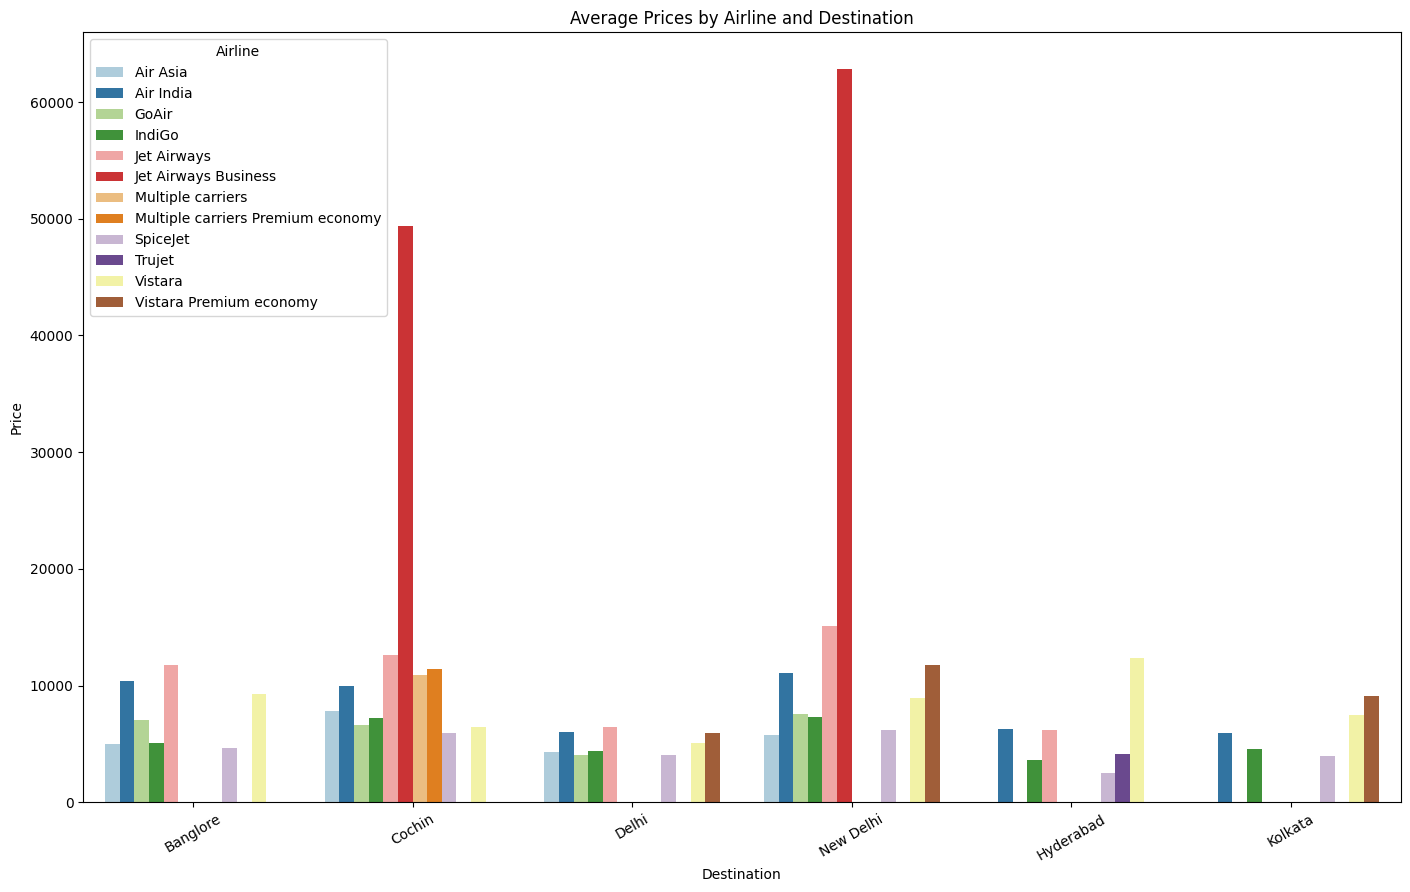

In [20]:
# Set the figure size
plt.figure(figsize=(17,10))

# Plot the datafram
sns.barplot(x="Destination", y="Price", hue="Airline", data=price_mean, palette='Paired')
plt.title("Average Prices by Airline and Destination")
plt.xlabel("Destination")
plt.ylabel("Price")
plt.xticks(rotation=30);

##### Conclusion about the graphs above

For each destination represented on the `X axis`, there's the price represented on the `Y axis` for each airline represented by colors as show the legend.

We can see that the `Jet Airways Business` has only on 2 destinations and also they are the most expensive tickets. `Jet Airways` has the most expensive ticket right after for each city it has as destination (but Hyderabad).

Also the most popular destinations look to be Cochin and New Delhi. Banglore, Colchin and Delhi look to have small price mean difference for each airline.

We could also say that Kolkata is the least popular destination. We could consider Delhi and Hyderabad as not popular as the number of airlines active and the price mean is lower compared with the others city.

### Source

Let's have a look on the source mean price 

In [21]:
source_pivo = df.pivot_table(index='Airline', columns='Source', values='Price', aggfunc='mean').fillna(0)
source_pivo

Source,Banglore,Chennai,Delhi,Kolkata,Mumbai
Airline,,,,,
Air Asia,4574.280899,0.000000,7804.175000,5012.320000,0.000000
Air India,9238.198795,5895.640000,10000.068273,10357.324219,6260.051471
GoAir,4948.881720,0.000000,6587.157895,7047.000000,0.000000
IndiGo,5274.112811,4538.766304,7203.933333,5075.235955,3659.816327
Jet Airways,11021.732234,0.000000,12642.593317,11717.565287,6227.949772
Jet Airways Business,62844.250000,0.000000,49387.500000,0.000000,0.000000
Multiple carriers,0.000000,0.000000,10902.678094,0.000000,0.000000
Multiple carriers Premium economy,0.000000,0.000000,11418.846154,0.000000,0.000000
SpiceJet,4550.292818,3993.523438,5916.356322,4642.883333,2511.106557


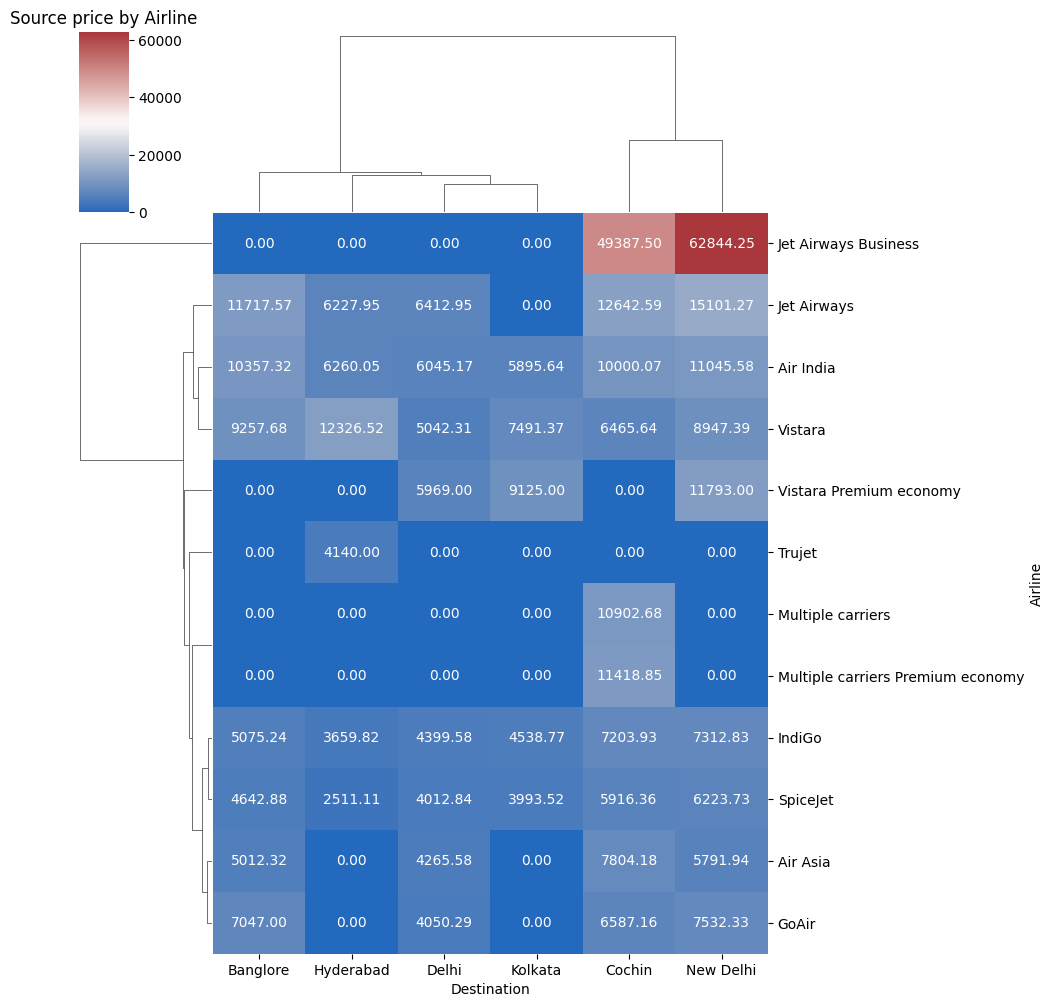

In [22]:
sns.clustermap(data=agrr, annot=True, fmt=".2f", vmin=0, cmap='vlag')
plt.title('Source price by Airline');

In [23]:
# Group by Source and Airline
source_mean = df.groupby(by=['Airline', 'Source'])[['Price']].mean()
source_mean

Price
Airline                           Source                
Air Asia                          Banglore   4574.280899
                                  Delhi      7804.175000
                                  Kolkata    5012.320000
Air India                         Banglore   9238.198795
                                  Chennai    5895.640000
                                  Delhi     10000.068273
                                  Kolkata   10357.324219
                                  Mumbai     6260.051471
GoAir                             Banglore   4948.881720
                                  Delhi      6587.157895
                                  Kolkata    7047.000000
IndiGo                            Banglore   5274.112811
                                  Chennai    4538.766304
                                  Delhi      7203.933333
                                  Kolkata    5075.235955
                                  Mumbai     3659.816327
Jet Airways                       Banglore  11021.732234
                                  Delhi     12642.593317
                                  Kolkata   11717.565287
                                  Mumbai     6227.949772
Jet Airways Business              Banglore  62844.250000
                                  Delhi     49387.500000
Multiple carriers                 Delhi     10902.678094
Multiple carriers Premium economy Delhi     11418.846154
SpiceJet                          Banglore   4550.292818
                                  Chennai    3993.523438
                                  Delhi      5916.356322
                                  Kolkata    4642.883333
                                  Mumbai     2511.106557
Trujet                            Mumbai     4140.000000
Vistara                           Banglore   6182.172973
                                  Chennai    7491.372093
                                  Delhi      6465.644444
                                  Kolkata    9257.683060
                                  Mumbai    12326.521739
Vistara Premium economy           Banglore   8881.000000
                                  Chennai    9125.000000

In [24]:
source_mean = source_mean.reset_index()

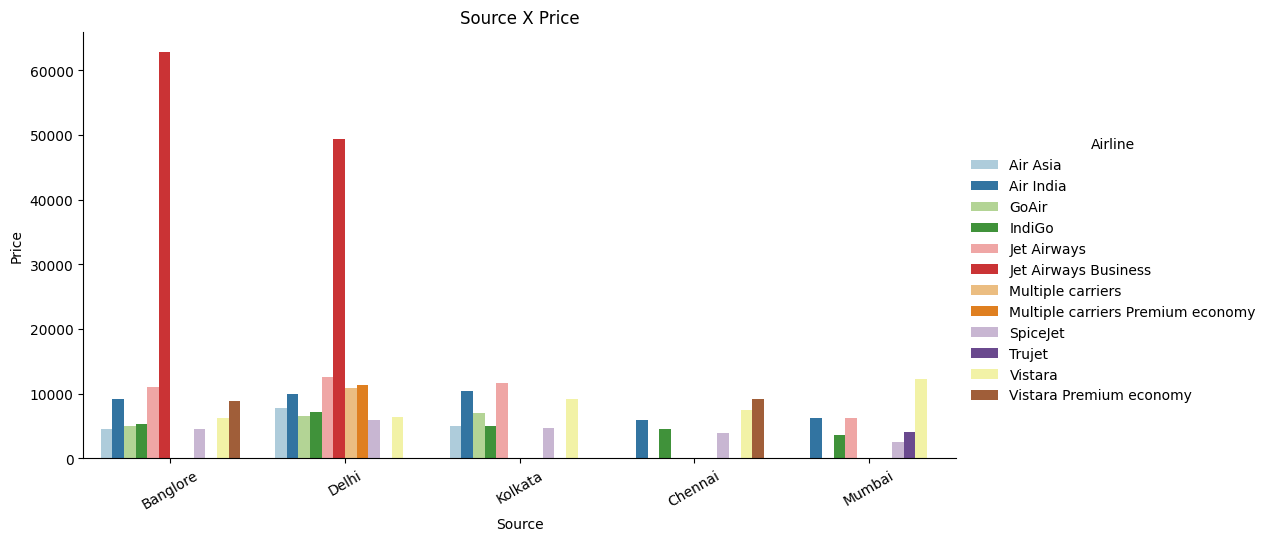

In [25]:
sns.catplot(data=source_mean, x='Source', y='Price', hue='Airline', kind='bar',aspect=2, palette='Paired')
plt.title('Source X Price')
plt.xticks(rotation=30);

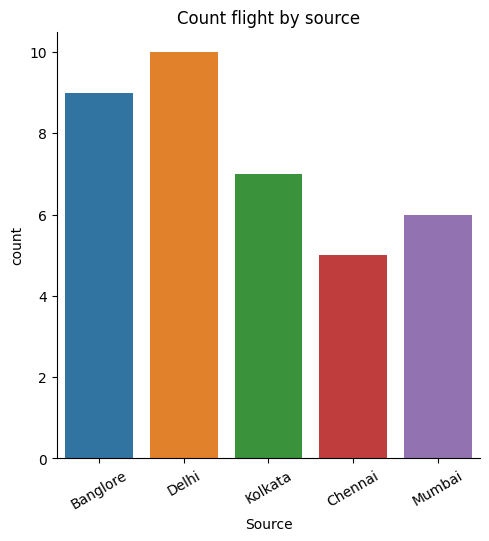

In [26]:
sns.catplot(data=source_mean, x='Source', kind='count')
plt.title('Count flight by source')
plt.xticks(rotation=30);

### Source & Destiantion

In [27]:
# Get the source and destination in one column
df['Source_dest'] = df['Source'] + ' - ' + df['Destination']

In [28]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Source_dest
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,Banglore - New Delhi
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,Kolkata - Banglore
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,Delhi - Cochin
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,Kolkata - Banglore
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,Banglore - New Delhi


In [29]:
df.shape

(10683, 12)

In [30]:
source_dest_price = df.groupby(by=['Airline', 'Source_dest'])[['Price']].mean()
source_dest_price

Price
Airline                           Source_dest                       
Air Asia                          Banglore - Delhi       4265.577465
                                  Banglore - New Delhi   5791.944444
                                  Delhi - Cochin         7804.175000
                                  Kolkata - Banglore     5012.320000
Air India                         Banglore - Delhi       6045.166667
                                  Banglore - New Delhi  11045.575472
                                  Chennai - Kolkata      5895.640000
                                  Delhi - Cochin        10000.068273
                                  Kolkata - Banglore    10357.324219
                                  Mumbai - Hyderabad     6260.051471
GoAir                             Banglore - Delhi       4050.289855
                                  Banglore - New Delhi   7532.333333
                                  Delhi - Cochin         6587.157895
                                  Kolkata - Banglore     7047.000000
IndiGo                            Banglore - Delhi       4399.581967
                                  Banglore - New Delhi   7312.828025
                                  Chennai - Kolkata      4538.766304
                                  Delhi - Cochin         7203.933333
                                  Kolkata - Banglore     5075.235955
                                  Mumbai - Hyderabad     3659.816327
Jet Airways                       Banglore - Delhi       6412.954054
                                  Banglore - New Delhi  15101.272727
                                  Delhi - Cochin        12642.593317
                                  Kolkata - Banglore    11717.565287
                                  Mumbai - Hyderabad     6227.949772
Jet Airways Business              Banglore - New Delhi  62844.250000
                                  Delhi - Cochin        49387.500000
Multiple carriers                 Delhi - Cochin        10902.678094
Multiple carriers Premium economy Delhi - Cochin        11418.846154
SpiceJet                          Banglore - Delhi       4012.839416
                                  Banglore - New Delhi   6223.727273
                                  Chennai - Kolkata      3993.523438
                                  Delhi - Cochin         5916.356322
                                  Kolkata - Banglore     4642.883333
                                  Mumbai - Hyderabad     2511.106557
Trujet                            Mumbai - Hyderabad     4140.000000
Vistara                           Banglore - Delhi       5042.312977
                                  Banglore - New Delhi   8947.388889
                                  Chennai - Kolkata      7491.372093
                                  Delhi - Cochin         6465.644444
                                  Kolkata - Banglore     9257.683060
                                  Mumbai - Hyderabad    12326.521739
Vistara Premium economy           Banglore - Delhi       5969.000000
                                  Banglore - New Delhi  11793.000000
                                  Chennai - Kolkata      9125.000000

In [31]:
source_dest_count = df.groupby(by=['Airline', 'Source_dest'])[['Price']].count()
source_dest_count.rename(columns={'Price': 'Count'}, inplace=True)
source_dest_count

Count
Airline                           Source_dest                
Air Asia                          Banglore - Delhi         71
                                  Banglore - New Delhi     18
                                  Delhi - Cochin           80
                                  Kolkata - Banglore      150
Air India                         Banglore - Delhi        120
                                  Banglore - New Delhi    212
                                  Chennai - Kolkata        25
                                  Delhi - Cochin          747
                                  Kolkata - Banglore      512
                                  Mumbai - Hyderabad      136
GoAir                             Banglore - Delhi         69
                                  Banglore - New Delhi     24
                                  Delhi - Cochin           76
                                  Kolkata - Banglore       25
IndiGo                            Banglore - Delhi        366
                                  Banglore - New Delhi    157
                                  Chennai - Kolkata       184
                                  Delhi - Cochin          705
                                  Kolkata - Banglore      445
                                  Mumbai - Hyderabad      196
Jet Airways                       Banglore - Delhi        370
                                  Banglore - New Delhi    418
                                  Delhi - Cochin         1586
                                  Kolkata - Banglore     1256
                                  Mumbai - Hyderabad      219
Jet Airways Business              Banglore - New Delhi      4
                                  Delhi - Cochin            2
Multiple carriers                 Delhi - Cochin         1196
Multiple carriers Premium economy Delhi - Cochin           13
SpiceJet                          Banglore - Delhi        137
                                  Banglore - New Delhi     44
                                  Chennai - Kolkata       128
                                  Delhi - Cochin           87
                                  Kolkata - Banglore      300
                                  Mumbai - Hyderabad      122
Trujet                            Mumbai - Hyderabad        1
Vistara                           Banglore - Delhi        131
                                  Banglore - New Delhi     54
                                  Chennai - Kolkata        43
                                  Delhi - Cochin           45
                                  Kolkata - Banglore      183
                                  Mumbai - Hyderabad       23
Vistara Premium economy           Banglore - Delhi          1
                                  Banglore - New Delhi      1
                                  Chennai - Kolkata         1

In [32]:
source_dest = pd.concat([source_dest_count, round(source_dest_price, 2)], axis=1)

In [33]:
source_dest

Count     Price
Airline                           Source_dest                          
Air Asia                          Banglore - Delhi         71   4265.58
                                  Banglore - New Delhi     18   5791.94
                                  Delhi - Cochin           80   7804.18
                                  Kolkata - Banglore      150   5012.32
Air India                         Banglore - Delhi        120   6045.17
                                  Banglore - New Delhi    212  11045.58
                                  Chennai - Kolkata        25   5895.64
                                  Delhi - Cochin          747  10000.07
                                  Kolkata - Banglore      512  10357.32
                                  Mumbai - Hyderabad      136   6260.05
GoAir                             Banglore - Delhi         69   4050.29
                                  Banglore - New Delhi     24   7532.33
                                  Delhi - Cochin           76   6587.16
                                  Kolkata - Banglore       25   7047.00
IndiGo                            Banglore - Delhi        366   4399.58
                                  Banglore - New Delhi    157   7312.83
                                  Chennai - Kolkata       184   4538.77
                                  Delhi - Cochin          705   7203.93
                                  Kolkata - Banglore      445   5075.24
                                  Mumbai - Hyderabad      196   3659.82
Jet Airways                       Banglore - Delhi        370   6412.95
                                  Banglore - New Delhi    418  15101.27
                                  Delhi - Cochin         1586  12642.59
                                  Kolkata - Banglore     1256  11717.57
                                  Mumbai - Hyderabad      219   6227.95
Jet Airways Business              Banglore - New Delhi      4  62844.25
                                  Delhi - Cochin            2  49387.50
Multiple carriers                 Delhi - Cochin         1196  10902.68
Multiple carriers Premium economy Delhi - Cochin           13  11418.85
SpiceJet                          Banglore - Delhi        137   4012.84
                                  Banglore - New Delhi     44   6223.73
                                  Chennai - Kolkata       128   3993.52
                                  Delhi - Cochin           87   5916.36
                                  Kolkata - Banglore      300   4642.88
                                  Mumbai - Hyderabad      122   2511.11
Trujet                            Mumbai - Hyderabad        1   4140.00
Vistara                           Banglore - Delhi        131   5042.31
                                  Banglore - New Delhi     54   8947.39
                                  Chennai - Kolkata        43   7491.37
                                  Delhi - Cochin           45   6465.64
                                  Kolkata - Banglore      183   9257.68
                                  Mumbai - Hyderabad       23  12326.52
Vistara Premium economy           Banglore - Delhi          1   5969.00
                                  Banglore - New Delhi      1  11793.00
                                  Chennai - Kolkata         1   9125.00

In [34]:
source_dest_price = source_dest_price.reset_index()

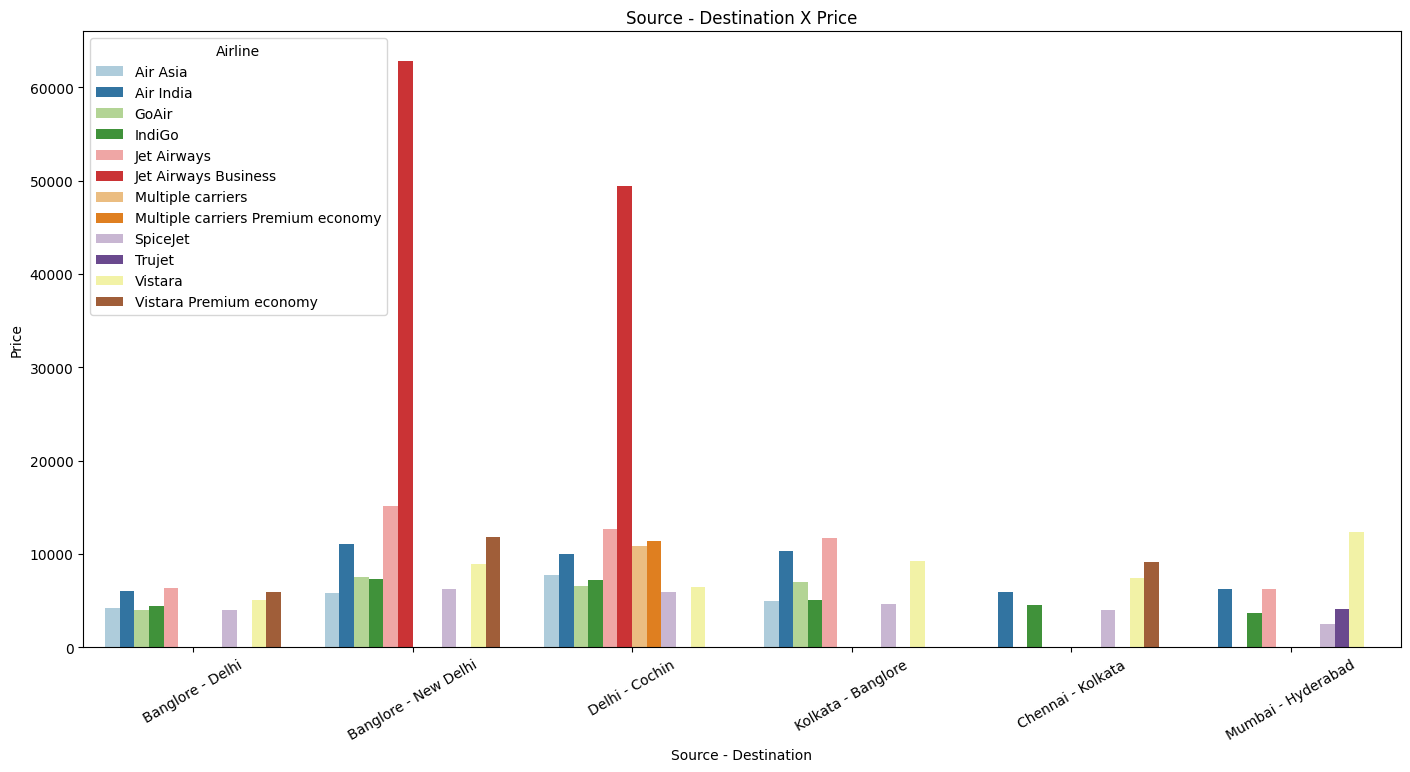

In [35]:
plt.figure(figsize=(17,8))
sns.barplot(x="Source_dest", y="Price", hue="Airline", data=source_dest_price, palette='Paired')
plt.title("Source - Destination X Price")
plt.xlabel("Source - Destination")
plt.ylabel("Price")
plt.xticks(rotation=30);

##### Conclusion

The more expensive flights are from `Banglore` to `New Delhi` and from `Delhi` to `Cochin` also these cities. Also it look there are more airlines actively taking on these cities. Delhi is Union of districts and New Delhi is one of the districts. I am assuming the people that are going to Delhi, they are not going to New Delhi but to others districts. 

`Jet Airways Business` has flights from `Banglore` to `New Delhi` and `Delhi` to `Cochin` which are probably the big and strongest economic cities. We have seen that has only a few flight but still with very high prices.

## Date of the Journey

When I book tickets to flight to somewhere the day has a very high influence on the price of the ticket. Let's compare the price by date

In [36]:
df.Date_of_Journey.dtype

dtype('O')

In [37]:
# Turning date of the journey into datetime
df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'], format="%d/%m/%Y")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10683 non-null  object        
 1   Date_of_Journey  10683 non-null  datetime64[ns]
 2   Source           10683 non-null  object        
 3   Destination      10683 non-null  object        
 4   Route            10682 non-null  object        
 5   Dep_Time         10683 non-null  object        
 6   Arrival_Time     10683 non-null  object        
 7   Duration         10683 non-null  object        
 8   Total_Stops      10682 non-null  object        
 9   Additional_Info  10683 non-null  object        
 10  Price            10683 non-null  int64         
 11  Source_dest      10683 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 1001.7+ KB


In [38]:
# Collecting the date's range of the flights in the dataset
min(df['Date_of_Journey']),max(df['Date_of_Journey'])

(Timestamp('2019-03-01 00:00:00'), Timestamp('2019-06-27 00:00:00'))

The date has a range of 3 months. I want to check few things.
* In general, which month is more expensive
* which airline is more expensive for each month

In [39]:
price_mean_monthly = round(df.groupby(by=df['Date_of_Journey'].dt.strftime('%m'))[['Price']].mean(), 2)
price_mean_monthly

,Price
Date_of_Journey,
03,10673.21
04,5770.85
05,9127.25
06,8828.80


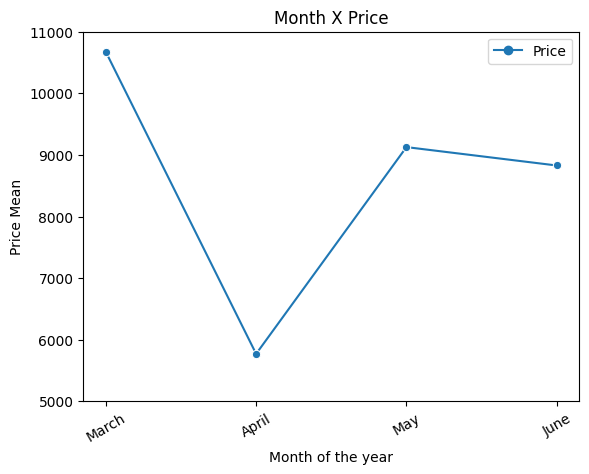

In [40]:
# Plotting the monthly price mean
sns.lineplot(data=price_mean_monthly, markers=True)
plt.title('Month X Price')
plt.xlabel('Month of the year')
plt.ylabel('Price Mean')
plt.xticks([0, 1, 2, 3],['March', 'April', 'May', 'June'], rotation=30)
plt.ylim(top=11000, bottom=5000);

The cheapest month is by far April. March is the most expensive. 

In [41]:
# Checking the business month flights
df[df['Airline'] == 'Jet Airways Business']['Date_of_Journey'].unique()

<DatetimeArray>
['2019-03-01 00:00:00', '2019-03-03 00:00:00', '2019-03-06 00:00:00']
Length: 3, dtype: datetime64[ns]

The business flights are the most expensive and all of them happened in march where the price is the highest. Let's check if we remove the business would affect the price of flights on the month of march.

In [42]:
no_business = df.drop(index=df[df['Airline'] == 'Jet Airways Business'].index)
assert(df.shape[0] != no_business.shape[0])

In [43]:
no_business = round(no_business.groupby(by=no_business['Date_of_Journey'].dt.strftime('%m'))[['Price']].mean(), 2)

In [44]:
no_business

,Price
Date_of_Journey,
03,10567.94
04,5770.85
05,9127.25
06,8828.80


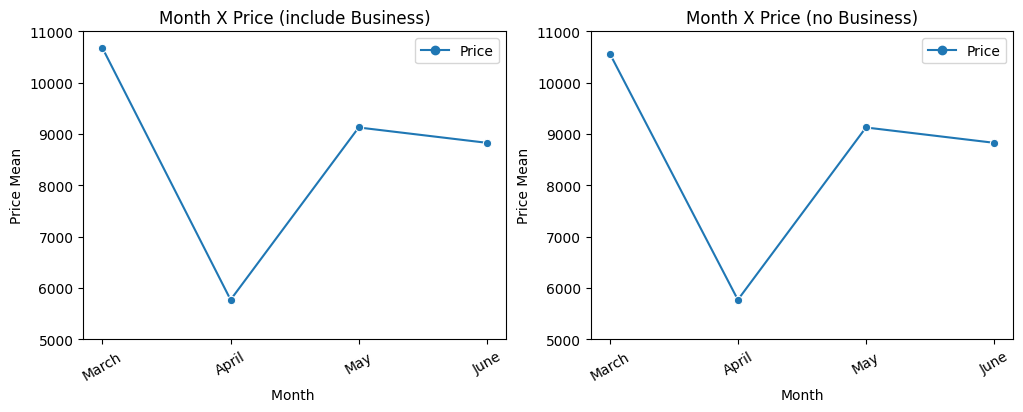

In [45]:
plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
sns.lineplot(data=price_mean_monthly, markers=True, dashes=True)
plt.title('Month X Price (include Business)')
plt.xlabel('Month ')
plt.ylabel('Price Mean')
plt.xticks([0, 1, 2, 3],['March', 'April', 'May', 'June'], rotation=30)
plt.ylim(top=11000, bottom=5000)



plt.subplot(1, 2, 2)
sns.lineplot(data=no_business, markers=True)
plt.title('Month X Price (no Business)')
plt.xticks([0, 1, 2, 3], ['March', 'April', 'May', 'June'], rotation=30)
plt.ylabel('Price Mean')
plt.xlabel('Month')
plt.ylim(top=11000, bottom=5000);

We can see it's about the same as the number of business flight are very low. Let's check the number of flights each month and compare them.

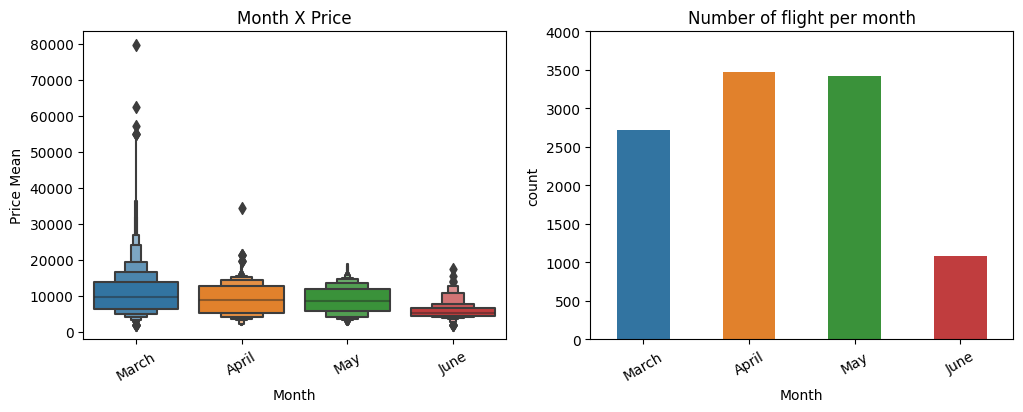

In [46]:
plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
sns.boxenplot(data=df, x=df['Date_of_Journey'].dt.strftime('%m'), y='Price')
plt.title('Month X Price')
plt.xlabel('Month')
plt.ylabel('Price Mean')
plt.xticks([0, 1, 2, 3],['March', 'April', 'May', 'June'], rotation=30)



plt.subplot(1, 2, 2)
sns.countplot(data=df, x=df['Date_of_Journey'].dt.strftime('%m'), width=0.5)
plt.title('Number of flight per month')
plt.xlabel('Month')
plt.xticks([0, 1, 2, 3], ['March', 'April', 'May', 'June'], rotation=30)
plt.ylim(top=4000);


We can see that the flights price is dropping each month. The graph above show us that in march we have so prices over 20.000. In April we have few outliers over 20.000. from May we don't have any flight over 20.000

#### Airline X Month

In [47]:
airline_month = df.groupby(by=['Airline', df['Date_of_Journey'].dt.strftime('%m')])[['Price']].mean()
airline_month

Price
Airline                           Date_of_Journey              
Air Asia                          03                5988.016667
                                  04                4729.362069
                                  05                5174.346154
                                  06                6304.917526
Air India                         03               10699.747170
                                  04                6250.581081
                                  05                9780.588435
                                  06                9242.598765
GoAir                             03                8124.275000
                                  04                4953.431818
                                  05                5812.220000
                                  06                5058.533333
IndiGo                            03                7212.329806
                                  04                4779.929712
                                  05                5229.685053
                                  06                5112.076923
Jet Airways                       03               13414.112598
                                  04                7578.851852
                                  05               11665.133767
                                  06               11243.904542
Jet Airways Business              03               58358.666667
Multiple carriers                 03               12709.386581
                                  04                8617.187500
                                  05               10151.741047
                                  06               10394.063492
Multiple carriers Premium economy 03               11418.846154
SpiceJet                          03                5322.122905
                                  04                4248.403846
                                  05                4060.429150
                                  06                3942.288136
Trujet                            03                4140.000000
Vistara                           03                9849.060345
                                  04                6306.863014
                                  05                7664.733728
                                  06                6910.900826
Vistara Premium economy           03               10459.000000
                                  04                5969.000000

In [48]:
airline_month = airline_month.reset_index()

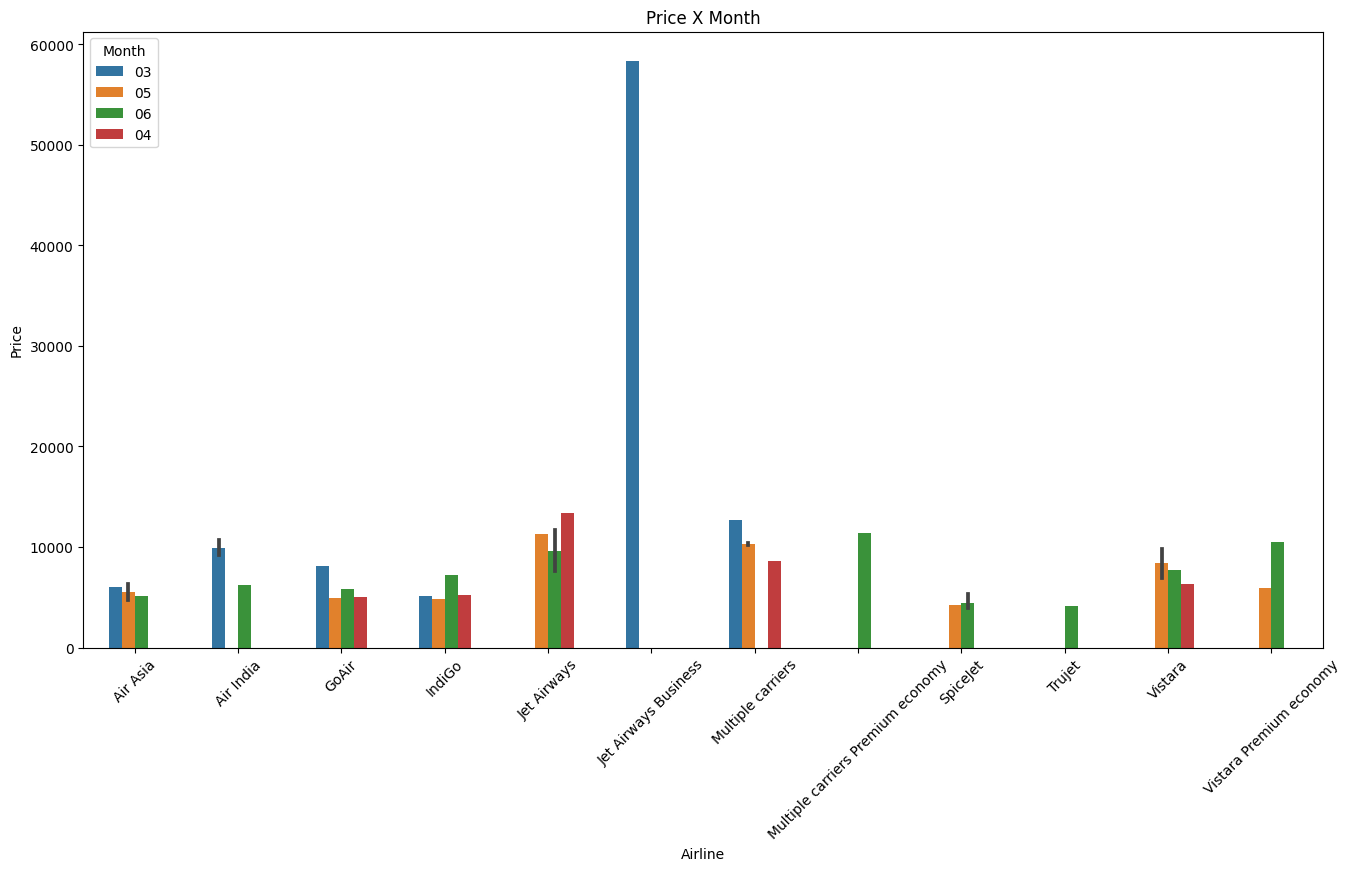

In [49]:
plt.figure(figsize=(16,8))
sns.barplot(data=airline_month, x=airline_month.Airline, y='Price', hue=df['Date_of_Journey'].dt.strftime('%m'), width=0.5)
plt.title('Price X Month')
plt.legend(title='Month')
plt.xticks(rotation=45);

##### Conclusion 

`Jet Airways` has the highest prices in April than others month. I would say that with bigger number of flights indicates a higher demand for flights and that would be the reason to put the prices up in April. Also we've seen the number of flights in this airline is very high compare with other which it shows the popularity of the brand.

`Multiple Carries` is cheaper I believe is due the number of stops to change the carrier. We'll see how the stops affect the flight prices later on.

## Stops X Price

In [50]:
# Creating a pivot table with stop and price mean
stops_price = np.round(df.pivot_table(index='Airline', columns='Total_Stops', values='Price', aggfunc='mean').fillna(0),2)
stops_price

Total_Stops,1 stop,2 stops,3 stops,4 stops,non-stop
Airline,,,,,
Air Asia,7078.33,6341.89,0.00,0.0,4492.33
Air India,9041.51,12092.78,12208.05,17686.0,5605.33
GoAir,6884.68,0.00,0.00,0.0,4726.17
IndiGo,7104.72,7507.53,0.00,0.0,4731.17
Jet Airways,12512.74,13387.25,0.00,0.0,6175.08
Jet Airways Business,62844.25,49387.50,0.00,0.0,0.00
Multiple carriers,10711.32,14809.40,17292.75,0.0,0.00
Multiple carriers Premium economy,11418.85,0.00,0.00,0.0,0.00
SpiceJet,6750.56,0.00,0.00,0.0,3805.42


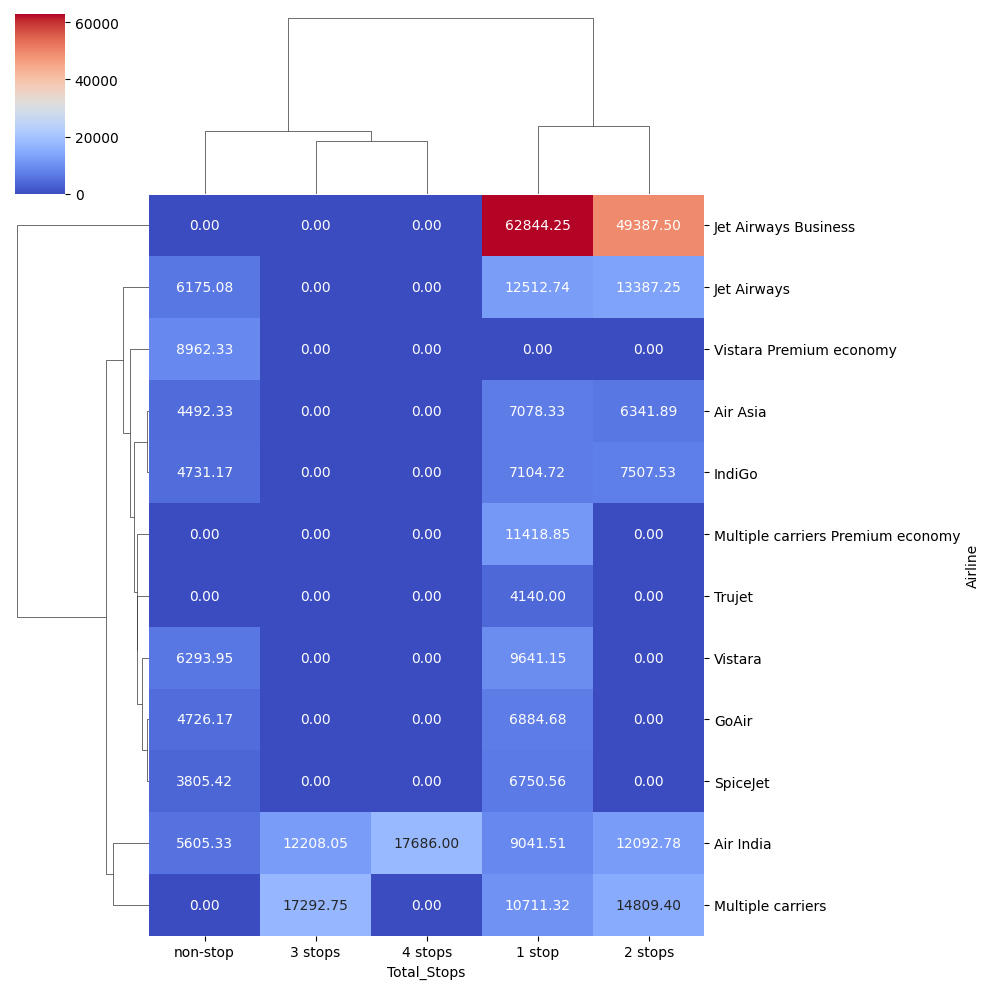

In [51]:
# Cluster map to check the hierarchically the airlines and stops
sns.clustermap(data=stops_price, annot=True, fmt=".2f" ,cmap='coolwarm');

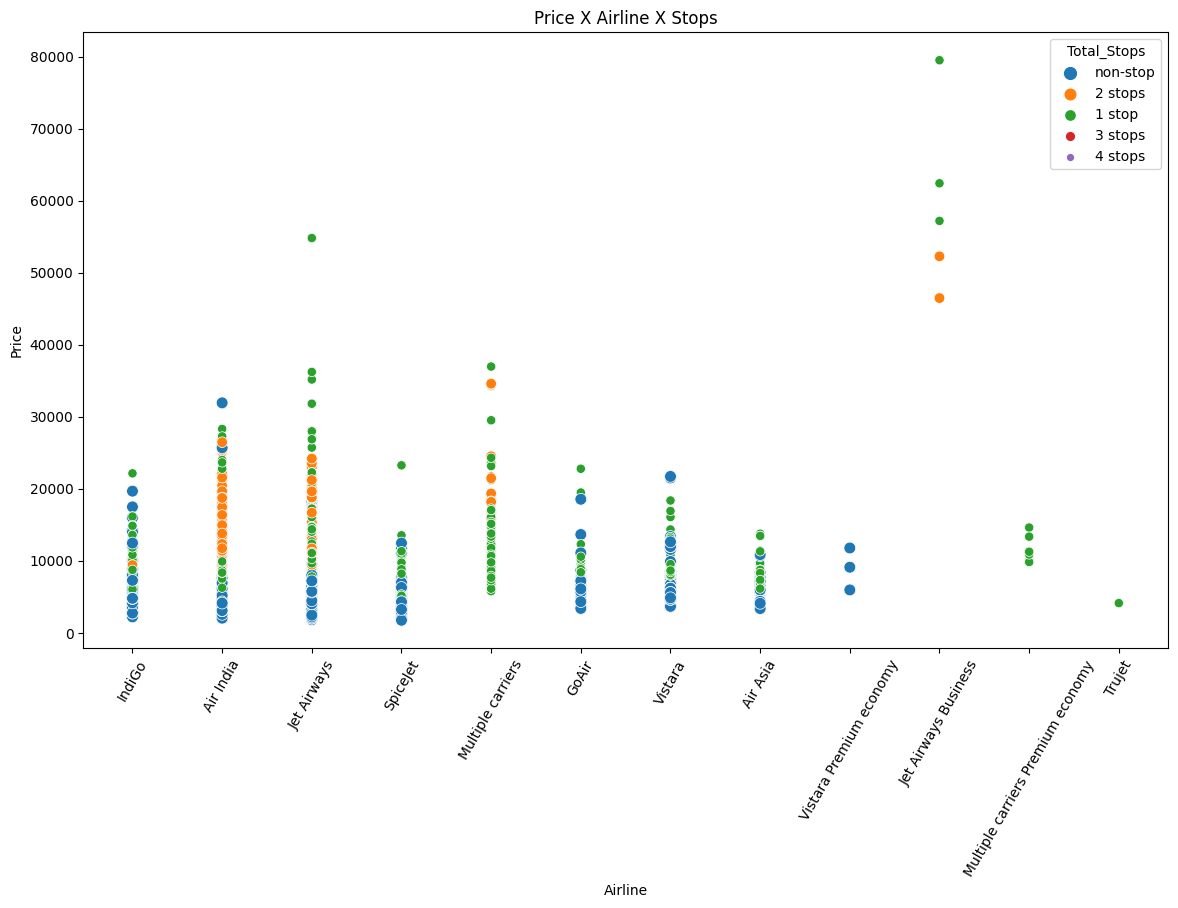

In [52]:
# Plotting flight based on their number of stops and price
plt.figure(figsize=(14, 8))
sns.scatterplot(data=df, x='Airline', y='Price', hue='Total_Stops', size='Total_Stops')
plt.title('Price X Airline X Stops')
plt.xticks(rotation=60);

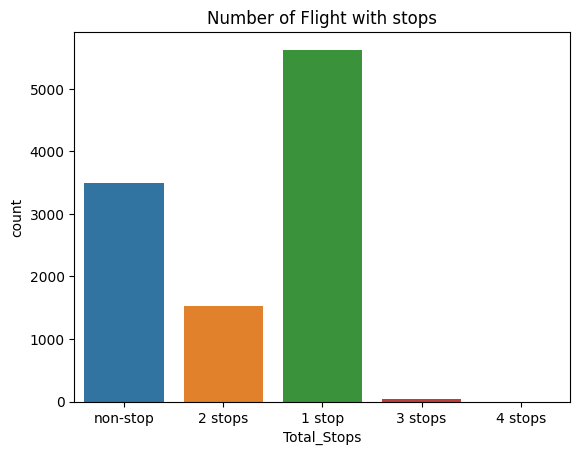

In [53]:
sns.countplot(data=df, x='Total_Stops')
plt.title('Number of Flight with stops');

In [54]:
df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [55]:
df[df['Total_Stops'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Source_dest
9039,Air India,2019-05-06,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480,Delhi - Cochin


In [56]:
df.fillna('2 stops', inplace=True)

In [57]:
df['Total_Stops'] = df['Total_Stops'].map({'non-stop': 0, '2 stops': 2, '1 stop': 1, '3 stops': 3, '4 stops': 4})

In [58]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Source_dest
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0,No info,3897,Banglore - New Delhi
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,No info,7662,Kolkata - Banglore
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2,No info,13882,Delhi - Cochin
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1,No info,6218,Kolkata - Banglore
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1,No info,13302,Banglore - New Delhi


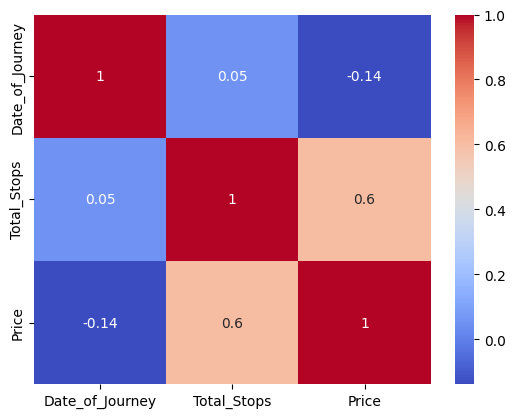

In [59]:
sns.heatmap(df.select_dtypes(exclude='object').corr(), annot=True, cmap='coolwarm');

If the number of stops increase the price increase too. The first graph we could see that the most are between 2 and 3 stops. Popular airline like `Jet Airways` charge more for flight with at least 1 stop

# Cleaning Dataset

#### Import

In [60]:
import pickle
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

## Handling Numerical Features

I will transform the *datetime* in the following features:
* `Date_of_Journey`
* `Dep_Time`
* `Arrival_time`
* `Duration`

The number of stops I have transformed only in numbers already

In [61]:
# Saving day and monthe of the journey in 2 different columns
df['Journey_day'] = df['Date_of_Journey'].dt.day
df['Journey_month'] = df['Date_of_Journey'].dt.month

In [62]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Source_dest,Journey_day,Journey_month
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0,No info,3897,Banglore - New Delhi,24,3
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,No info,7662,Kolkata - Banglore,1,5
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2,No info,13882,Delhi - Cochin,9,6
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1,No info,6218,Kolkata - Banglore,12,5
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1,No info,13302,Banglore - New Delhi,1,3


In [63]:
# Saving depature hour and minutes in 2 different columns
df['Dep_hour'] = pd.to_datetime(df['Dep_Time'], format='%H:%M').dt.hour
df['Dep_minute'] = pd.to_datetime(df['Dep_Time'], format='%H:%M').dt.minute

In [64]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Source_dest,Journey_day,Journey_month,Dep_hour,Dep_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0,No info,3897,Banglore - New Delhi,24,3,22,20
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,No info,7662,Kolkata - Banglore,1,5,5,50
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2,No info,13882,Delhi - Cochin,9,6,9,25
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1,No info,6218,Kolkata - Banglore,12,5,18,5
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1,No info,13302,Banglore - New Delhi,1,3,16,50


In [65]:
# Saving arrival hour and minutes in 2 different columns
df['Arrival_hour'] = pd.to_datetime(df['Arrival_Time']).dt.hour
df['Arrival_minute'] = pd.to_datetime(df['Arrival_Time']).dt.minute

C:\Users\MATHEUS\AppData\Local\Temp\ipykernel_3008\4030684556.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Arrival_hour'] = pd.to_datetime(df['Arrival_Time']).dt.hour
C:\Users\MATHEUS\AppData\Local\Temp\ipykernel_3008\4030684556.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Arrival_minute'] = pd.to_datetime(df['Arrival_Time']).dt.minute


In [66]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Source_dest,Journey_day,Journey_month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0,No info,3897,Banglore - New Delhi,24,3,22,20,1,10
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,No info,7662,Kolkata - Banglore,1,5,5,50,13,15
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2,No info,13882,Delhi - Cochin,9,6,9,25,4,25
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1,No info,6218,Kolkata - Banglore,12,5,18,5,23,30
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1,No info,13302,Banglore - New Delhi,1,3,16,50,21,35


In [67]:
# Creating a function to remove the 'h' in duration
def remove_symbol(time):
    if 'h' in time:
        time = time.split('h')
        return int(time[0])
    else:
        return 0

In [68]:
# Applying the function in a new column
df['Duration_hour'] = df['Duration'].apply(remove_symbol)

In [69]:
# Define a function to remove the 'm' from minutes in duration
def remove_symbol_2(time):
    if 'm' in time:
        tempo = time.split()
        time = tempo[-1].strip('m').strip()
        return int(time)
    else:
        return 0

In [70]:
# Applyinf the function in a new column
df['Duration_minute'] = df['Duration'].apply(remove_symbol_2)

In [71]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Source_dest,Journey_day,Journey_month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,Duration_hour,Duration_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0,No info,3897,Banglore - New Delhi,24,3,22,20,1,10,2,50
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,No info,7662,Kolkata - Banglore,1,5,5,50,13,15,7,25
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2,No info,13882,Delhi - Cochin,9,6,9,25,4,25,19,0
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1,No info,6218,Kolkata - Banglore,12,5,18,5,23,30,5,25
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1,No info,13302,Banglore - New Delhi,1,3,16,50,21,35,4,45


## Handling Categorical Features

Let's use `OneHotEncoder` to encode the categorical features:
* `Airline`
* `Source`
* `Destination`

In [72]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Source_dest,Journey_day,Journey_month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,Duration_hour,Duration_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0,No info,3897,Banglore - New Delhi,24,3,22,20,1,10,2,50
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,No info,7662,Kolkata - Banglore,1,5,5,50,13,15,7,25
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2,No info,13882,Delhi - Cochin,9,6,9,25,4,25,19,0
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1,No info,6218,Kolkata - Banglore,12,5,18,5,23,30,5,25
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1,No info,13302,Banglore - New Delhi,1,3,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,2019-04-09,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,0,No info,4107,Kolkata - Banglore,9,4,19,55,22,25,2,30
10679,Air India,2019-04-27,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,0,No info,4145,Kolkata - Banglore,27,4,20,45,23,20,2,35
10680,Jet Airways,2019-04-27,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,0,No info,7229,Banglore - Delhi,27,4,8,20,11,20,3,0
10681,Vistara,2019-03-01,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,0,No info,12648,Banglore - New Delhi,1,3,11,30,14,10,2,40


In [73]:
# Iniciate OneHotEncoder
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

In [74]:
# Fit and tranform the categorical features
cat_prep = ohe.fit_transform(df[['Airline', 'Source', 'Destination']])

In [75]:
# Checj teh features name
ohe.get_feature_names_out()

array(['Airline_Air Asia', 'Airline_Air India', 'Airline_GoAir',
       'Airline_IndiGo', 'Airline_Jet Airways',
       'Airline_Jet Airways Business', 'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara',
       'Airline_Vistara Premium economy', 'Source_Banglore',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata',
       'Source_Mumbai', 'Destination_Banglore', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'], dtype=object)

In [76]:
# Turn into dataframe 
cat_ohe = pd.DataFrame(data=cat_prep, columns=[col for col in ohe.get_feature_names_out()])

In [77]:
data = pd.concat([df, cat_ohe], axis=1)

In [78]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0,No info,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,No info,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2,No info,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1,No info,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1,No info,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [79]:
# Chencking if the dataset is ready to drop the unecessery columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 43 columns):
 #   Column                                     Non-Null Count  Dtype         
---  ------                                     --------------  -----         
 0   Airline                                    10683 non-null  object        
 1   Date_of_Journey                            10683 non-null  datetime64[ns]
 2   Source                                     10683 non-null  object        
 3   Destination                                10683 non-null  object        
 4   Route                                      10683 non-null  object        
 5   Dep_Time                                   10683 non-null  object        
 6   Arrival_Time                               10683 non-null  object        
 7   Duration                                   10683 non-null  object        
 8   Total_Stops                                10683 non-null  int64         
 9   Additional_Info  

In [80]:
data.drop(
    columns=[col for col in data.select_dtypes(include=['object', 'datetime']).columns],
    inplace=True
)

In [81]:
data.head()

,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,Duration_hour,Duration_minute,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2,7662,1,5,5,50,13,15,7,25,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,2,13882,9,6,9,25,4,25,19,0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1,6218,12,5,18,5,23,30,5,25,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1,13302,1,3,16,50,21,35,4,45,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


##### Check the correlation among the features

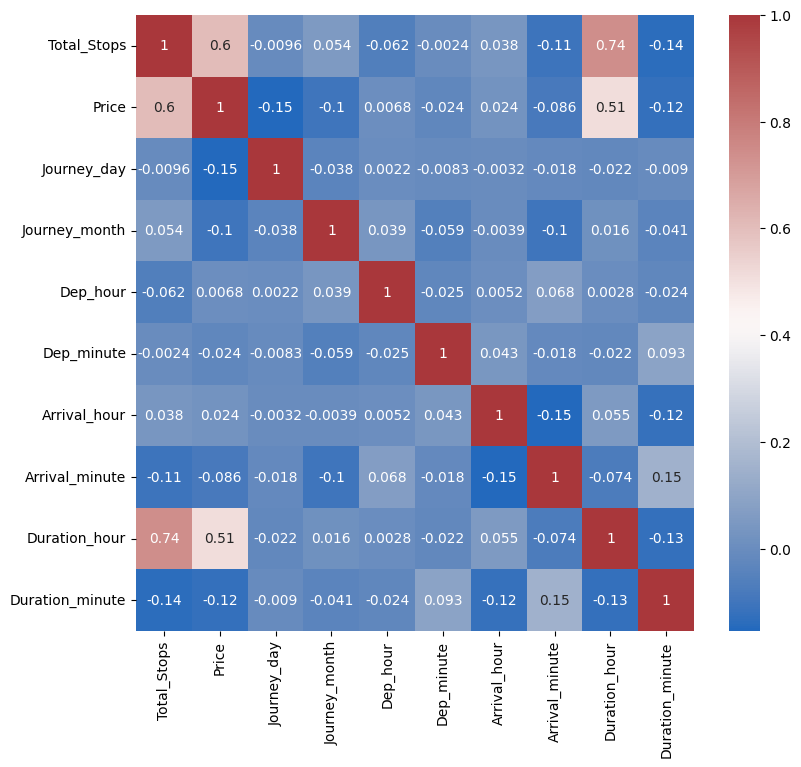

In [82]:
plt.figure(figsize=(16, 8))
sns.heatmap(data.select_dtypes(include='int').corr(), annot=True, cmap='vlag')
plt.gcf().set_size_inches(9, 8);

# Modelling

In [83]:
# Set the X and y
X = data.drop(columns='Price')
y = data['Price']

## Baseline model

##### Import

In [84]:
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split, cross_validate, learning_curve
from sklearn import metrics

In [85]:
scaler = MinMaxScaler()
X_fitted = scaler.fit(X)
scaler.get_feature_names_out()

array(['Total_Stops', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_minute', 'Arrival_hour', 'Arrival_minute', 'Duration_hour',
       'Duration_minute', 'Airline_Air Asia', 'Airline_Air India',
       'Airline_GoAir', 'Airline_IndiGo', 'Airline_Jet Airways',
       'Airline_Jet Airways Business', 'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara',
       'Airline_Vistara Premium economy', 'Source_Banglore',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata',
       'Source_Mumbai', 'Destination_Banglore', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'], dtype=object)

In [86]:
# Scaling features in range of 0 and 1
X_scaled = pd.DataFrame(data=X_fitted.transform(X), columns=[col for col in scaler.get_feature_names_out()])

In [87]:
X_scaled

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,Duration_hour,Duration_minute,Airline_Air Asia,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0.00,0.884615,0.000000,0.956522,0.363636,0.043478,0.181818,0.042553,0.909091,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.50,0.000000,0.666667,0.217391,0.909091,0.565217,0.272727,0.148936,0.454545,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.50,0.307692,1.000000,0.391304,0.454545,0.173913,0.454545,0.404255,0.000000,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.25,0.423077,0.666667,0.782609,0.090909,1.000000,0.545455,0.106383,0.454545,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.25,0.000000,0.000000,0.695652,0.909091,0.913043,0.636364,0.085106,0.818182,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0.00,0.307692,0.333333,0.826087,1.000000,0.956522,0.454545,0.042553,0.545455,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
10679,0.00,1.000000,0.333333,0.869565,0.818182,1.000000,0.363636,0.042553,0.636364,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
10680,0.00,1.000000,0.333333,0.347826,0.363636,0.478261,0.363636,0.063830,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
10681,0.00,0.000000,0.000000,0.478261,0.545455,0.608696,0.181818,0.042553,0.727273,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [88]:
# Split train and test data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Iniciate the base model
lin_reg = LinearRegression()

In [89]:
# Fit the X and y
lin_reg.fit(X_train, y_train)

LinearRegression()

In [90]:
lin_reg.score(X_train, y_train)

0.6233900078361285

In [91]:
pred = lin_reg.predict(X_test)

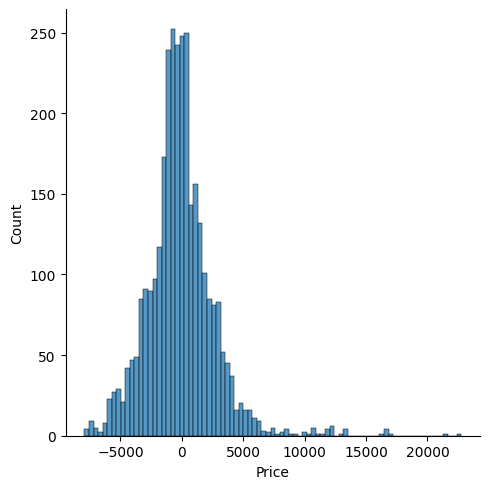

In [92]:
# Plot error distribution
sns.displot(y_test - pred);

## Modeling

In [93]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [94]:
# Iniciate the model
tree = RandomForestRegressor()

# Split tran and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [109]:
X_train.columns

Index(['Total_Stops', 'Journey_day', 'Journey_month', 'Dep_hour', 'Dep_minute',
       'Arrival_hour', 'Arrival_minute', 'Duration_hour', 'Duration_minute',
       'Airline_Air Asia', 'Airline_Air India', 'Airline_GoAir',
       'Airline_IndiGo', 'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Banglore', 'Source_Chennai', 'Source_Delhi', 'Source_Kolkata',
       'Source_Mumbai', 'Destination_Banglore', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi'],
      dtype='object')

In [96]:
tree.fit(X_train, y_train)

RandomForestRegressor()

In [97]:
tree.score(X_test, y_test)

0.793892297913109

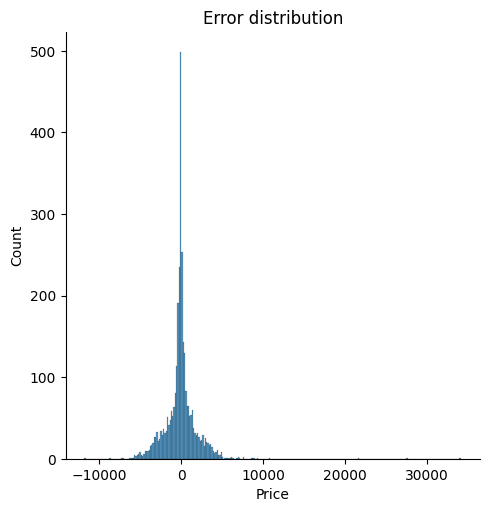

In [98]:
# Get the prediction and plotting the distribution
y_pred = tree.predict(X_test)

sns.displot(y_test - y_pred,)
plt.title('Error distribution');

In [99]:
print(f'R2: {round(metrics.r2_score(y_test, y_pred) * 100, 2)}%')
print(f'MSE percentage error: {round(metrics.mean_absolute_percentage_error(y_test, y_pred) * 100, 2)}%')

R2: 79.39%
MSE percentage error: 13.46%


### Optimize the model

In [100]:
# Set the params to optmize the model
param = dict(max_depth = [ 4, 7, 10, 15, 20],
min_samples_split = [2, 4, 10, 15],
min_samples_leaf = [1, 2, 4, 8, 10],
n_estimators = [500, 700, 900, 1000],
            )

# Using grid search the find the best parameters
search = GridSearchCV(estimator=tree, param_grid=param, cv=5).fit(X_train, y_train)

In [101]:
model = search.best_estimator_

In [102]:
model

RandomForestRegressor(max_depth=15, min_samples_split=4, n_estimators=500)

In [103]:
y_pred = model.predict(X_test)

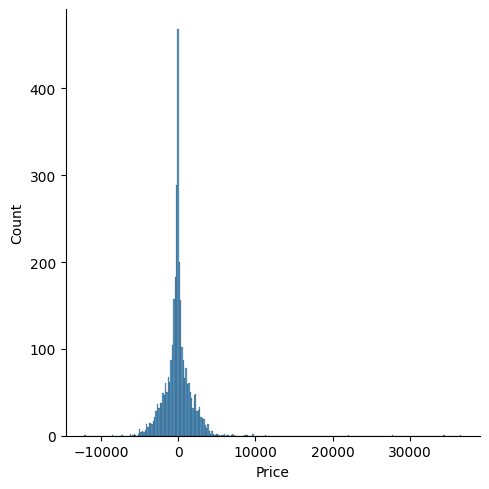

In [104]:
# Plotting the new error distribution
sns.displot(y_test - y_pred);

In [105]:
print(f'R2: {round(metrics.r2_score(y_test, y_pred) * 100, 2)}%')
print(f'MSE percentage error: {round(metrics.mean_absolute_percentage_error(y_test, y_pred) * 100, 2)}%')

R2: 81.07%
MSE percentage error: 12.98%


# Saving the model

In [106]:
with open('model2.pkl', 'wb') as file:
    pickle.dump(model, file)